### Setup

In [ ]:
!pip install numpy pandas tensorflow scikit-learn matplotlib seaborn scipy ctgan

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from ctgan import CTGAN
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.neighbors import KNeighborsClassifier

## Импорт датасета

In [83]:
iris = datasets.load_iris()

## Анализ

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
iris_df.head()

In [ ]:
iris_df.describe()

In [ ]:
iris_df.isnull().sum()

In [ ]:
iris_df['species'].value_counts()

In [ ]:
iris_df.corr(numeric_only=True)

In [ ]:
iris_df.groupby('species').mean()

In [ ]:
iris_df.groupby('species').std()

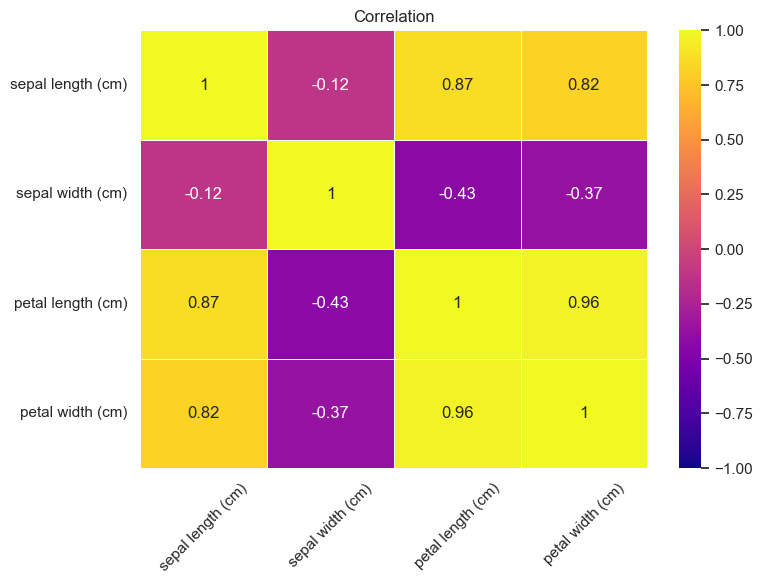

In [116]:
corr = iris_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="plasma", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

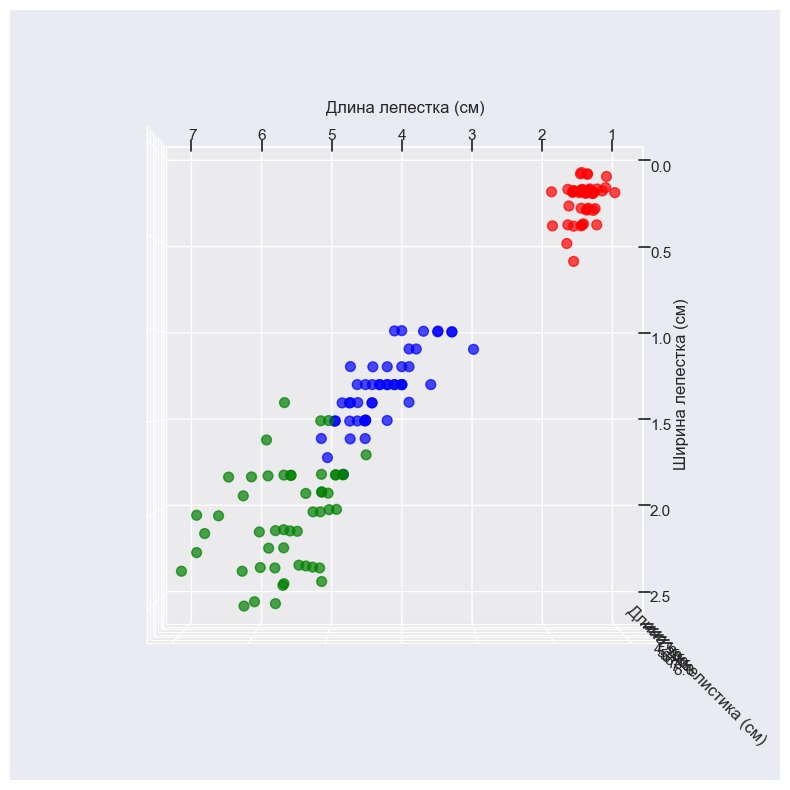

In [114]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']
z = iris_df['sepal length (cm)']

colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

for species in iris.target_names:
    idx = iris_df['species'] == species
    ax.scatter(x[idx], y[idx], z[idx], c=colors[species], label=species, s=50, alpha=0.7)

ax.set_xlabel('Длина лепестка (см)')
ax.set_ylabel('Ширина лепестка (см)')
ax.set_zlabel('Длина чашелистика (см)')

ax.view_init(elev=90, azim=95)
plt.show()

## Проверка KNN

In [93]:
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [94]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Knn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train)

#check 1
accuracy = knn.score(X_test_scaled, Y_test)
print("Knn Accuracy:", accuracy)
#check 2
Y_pred_knn = knn.predict(X_test_scaled)
print("Knn Accuracy:", metrics.accuracy_score(Y_test, Y_pred_knn))

Knn Accuracy: 1.0
Knn Accuracy: 1.0


In [96]:
# Err
confusion_matrix(Y_test, Y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])